In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import networkx
print networkx.__version__

1.11


In [3]:
M=nx.read_gml("polblogs.gml")

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

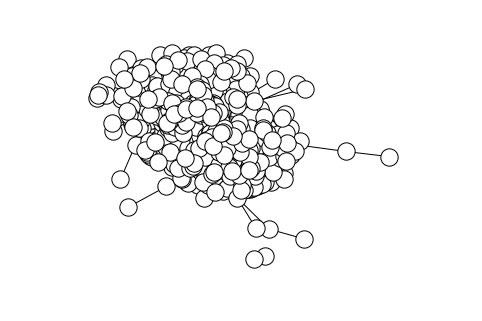

In [5]:
pos=nx.spring_layout(G, iterations=300, k=.5)
#nx.draw_networkx_labels(G,pos)
nx.draw(G, pos, node_color='w')

C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Vera Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


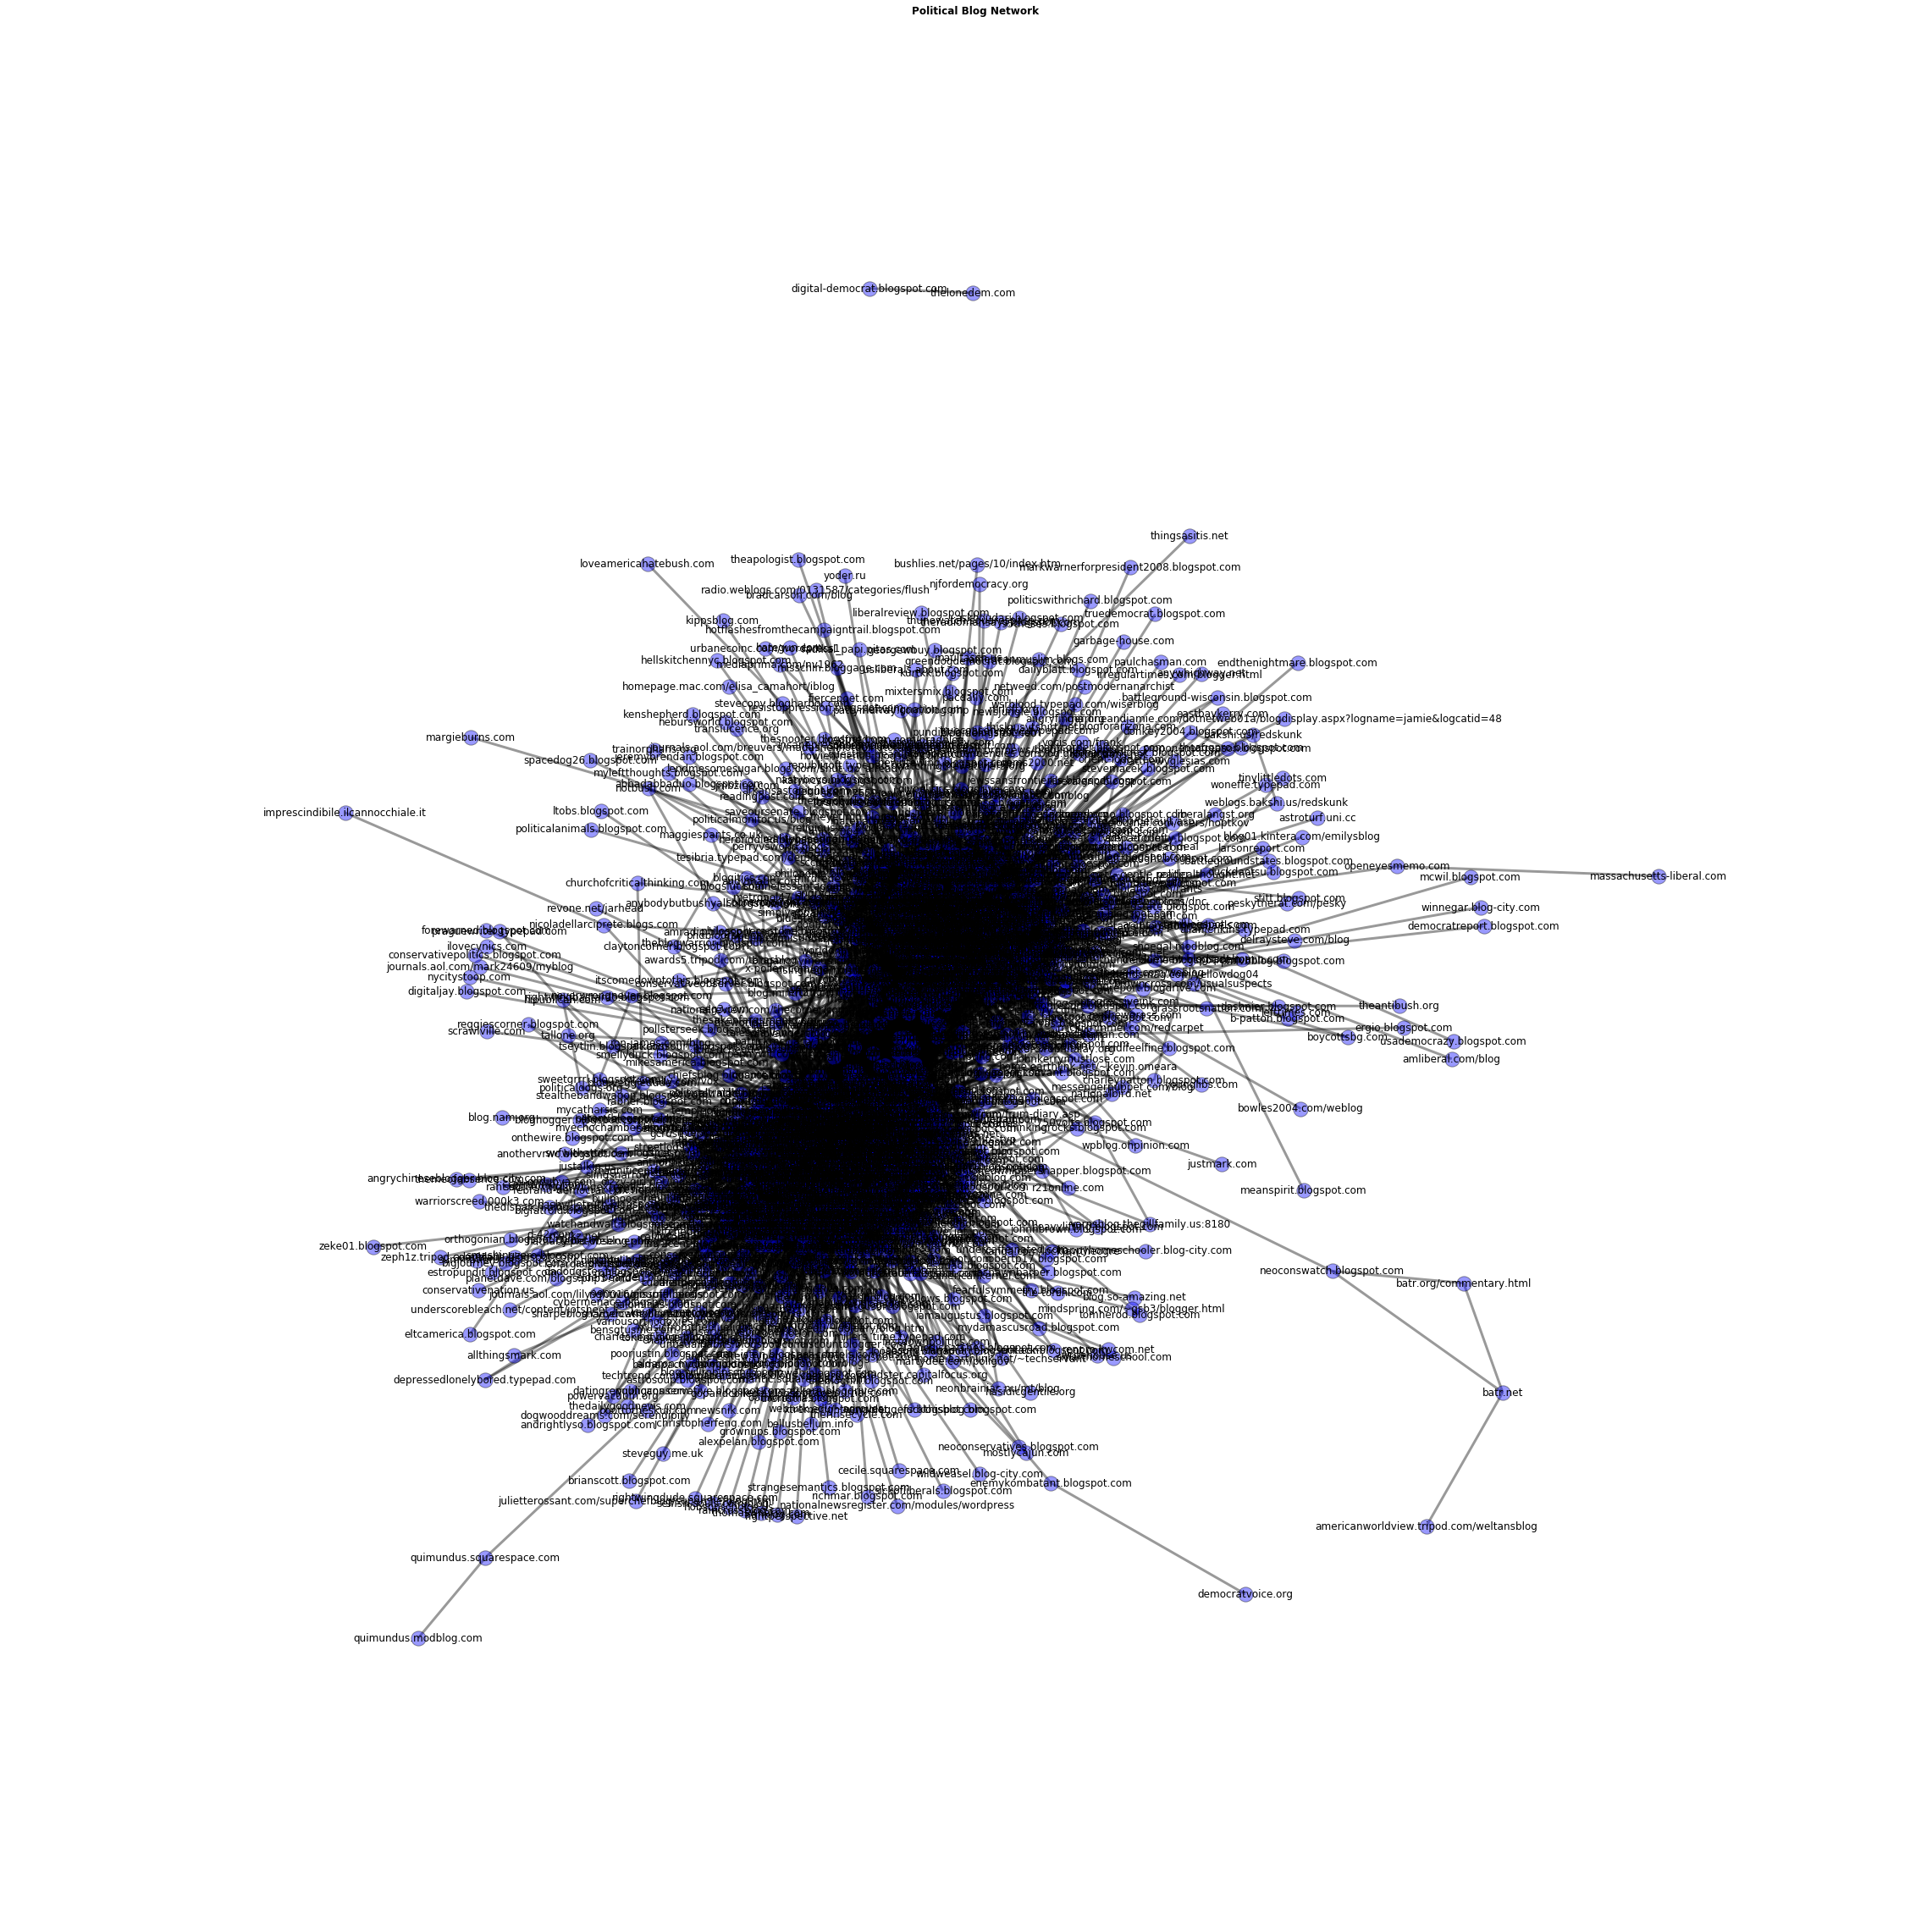

In [6]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=.5, k=1)
nx.draw_networkx_labels(G,pos,fontsize=10)
font = {'fontname'   : 'Vera Sans',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 12}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=30,width=3,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [7]:
centrality=nx.eigenvector_centrality(G)

In [8]:
PBN_list = []
for node in centrality:
    PBN_list.append((node,centrality[node]))
    
sorted_PBN_list = PBN_list.sort(key=lambda x: x[1])

In [9]:
Top10 = sorted(PBN_list, key=lambda x: x[1], reverse=True)[:10]
Top10

[(u'atrios.blogspot.com', 0.1948079793663771),
 (u'dailykos.com', 0.1608974020523483),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718307),
 (u'bodyandsoul.typepad.com', 0.14113489174330363),
 (u'liberaloasis.com', 0.1395237157110787),
 (u'tbogg.blogspot.com', 0.13703641699824257),
 (u'corrente.blogspot.com', 0.12941759274096148),
 (u'talkingpointsmemo.com', 0.12700519780790956),
 (u'dneiwert.blogspot.com', 0.12237564692546016)]

### 3.  What are the 10 least influential blogs?



In [10]:
Bottom10 = sorted(PBN_list, key=lambda x: x[1])[:10]
Bottom10

[(u'thelonedem.com', 1.776325109755965e-72),
 (u'digital-democrat.blogspot.com', 1.776325109755965e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916242e-09),
 (u'quimundus.modblog.com', 6.682929975006484e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.796325594929459e-07),
 (u'democratvoice.org', 1.0233388204113296e-06),
 (u'quimundus.squarespace.com', 6.061741218869531e-06),
 (u'massachusetts-liberal.com', 9.483365235734505e-06),
 (u'thingsasitis.net', 1.1736249650658606e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [11]:
nx.write_gexf(G,'pbn.gexf')

In [38]:
df = pd.read_csv("pbn [Nodes].csv", index_col='id')
df.head()

,label,modularity_class,eigencentrality
id,,,
newleftblogs.blogspot.com,newleftblogs.blogspot.com,0,0.626106
lashawnbarber.com,lashawnbarber.com,1,0.389964
gregpalast.com,gregpalast.com,0,0.162674
roxanne.typepad.com,roxanne.typepad.com,0,0.352328
interested-participant.blogspot.com,interested-participant.blogspot.com,1,0.100087


    ###TOP LEFT
    atrios.blogspot.com	0	1
    dailykos.com	0	0.980919616
    washingtonmonthly.com	0	0.938761076
    talkingpointsmemo.com	0	0.934030273
    digbysblog.blogspot.com	0	0.804179108
    liberaloasis.com	0	0.794234151
    bodyandsoul.typepad.com	0	0.766574899
    tbogg.blogspot.com	0	0.739347791
    pandagon.net	0	0.731316015
    talkleft.com	0	0.725866695
    
    BOTTOM LEFT
    thewashingtonnote.com	0	0.179123285
    polstate.com	0	0.174975745
    thatcoloredfellasweblog.bloghorn.com	0	0.174597022
    margaretcho.com/blog/blog.htm	0	0.171644243
    pinkofeministhellcat.typepad.com/pinko_feminist_hellcat	0	0.164633681
    gregpalast.com	0	0.16267416
    newdonkey.com	0	0.148904368
    bullmooseblog.com	0	0.141490467
    bartcop.com	0	0.138672218
    rooksrant.com	0	0.128713562###

    ###TOP RIGHT
    instapundit.com	1	0.764193996
    powerlineblog.com	1	0.500082429
    vodkapundit.com	1	0.493949328
    hughhewitt.com	1	0.483831366
    michellemalkin.com	1	0.459555353
    littlegreenfootballs.com/weblog	1	0.457757778
    nationalreview.com/thecorner	1	0.445147754
    outsidethebeltway.com	1	0.438107623
    volokh.com	1	0.43144958
    truthlaidbear.com	1	0.430937509
    
    BOTTOM RIGHT
    roseoftheknights.com/yank/pride.html	1	0.070931989
    americanwarmonger.blogspot.com	1	0.070319749
    right-thinking.com	1	0.068903403
    conservativeeyes.blogspot.com	1	0.061031875
    blithered.blogspot.com	1	0.057761968
    anncoulter.org	1	0.054787262
    homespunbloggers.blogspot.com	1	0.050071345
    prolifeblogs.com	1	0.04784537
    jeffblanco.blogdrive.com	1	0.023265612
    blogsagainsthillary.com	1	0.022753091###

In [39]:
import xml.etree.cElementTree as ET
import pandas as pd

In [40]:
import xml.etree.cElementTree as ET
import pandas as pd

In [46]:
modularity_class = ('C:\Users\campa\Downloads\CS570-master\CS570-master.pbn [Nodes].csv')
tree = ET.ElementTree(M)

In [47]:
import xml.etree.cElementTree as ET
import pandas as pd

In [48]:
tree = ET.ElementTree('pbn [Nodes].csv')

In [51]:
modularity_class_R = nx.Graph()
modularity_class_L = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if modularity_class_R.has_edge(u,v):
        R[u][v]['weight'] += 1
    else:
        modularity_class_R.add_edge(u, v, weight=1)


AttributeError: 'str' object has no attribute 'edges_iter'

In [52]:
centrality=nx.eigenvector_centrality(modularity_class_R,modularity_class_L)

NetworkXException: Empty graph.

In [53]:
R_list = []
for node in centrality:
    list.append((node,centrality[node]))
    
sorted_R_list = R_list.sort(key=lambda x: x[1])

TypeError: descriptor 'append' requires a 'list' object but received a 'tuple'

In [54]:
RTop10 = sorted(R_L_list, key=lambda x: x[1], reverse=True)[:10]
RTop10

[]

In [55]:
L_list = []
for node in centrality:
    list.append((node,centrality[node]))
    
sorted_L_list = L_list.sort(key=lambda x: x[1])

TypeError: descriptor 'append' requires a 'list' object but received a 'tuple'

In [56]:
LTop10 = sorted(L_list, key=lambda x: x[1], reverse=True)[:10]